### Regression Model to estimate sales based on advertising media
The following project estimates a linear model which can be used to predict sales based on spending on TV, Newspaper, and Radio media. In building the model we test for the statistical significance of the model coeffecients using t-test, p-values, and F-Statistics, and also the quality of the fit using R-squared.

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
rcParams['figure.figsize'] = 20,5

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error, r2_score

In [95]:
advertising = pd.read_csv('..\Datasets\Advertising.csv', index_col=0)
advertising.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [49]:
advertising.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


- Predict Sales based on TV, Radio, and Newspaper media

In [50]:
x = sm.add_constant(advertising[['TV', 'radio', 'newspaper']], prepend=False)
y = advertising['sales']

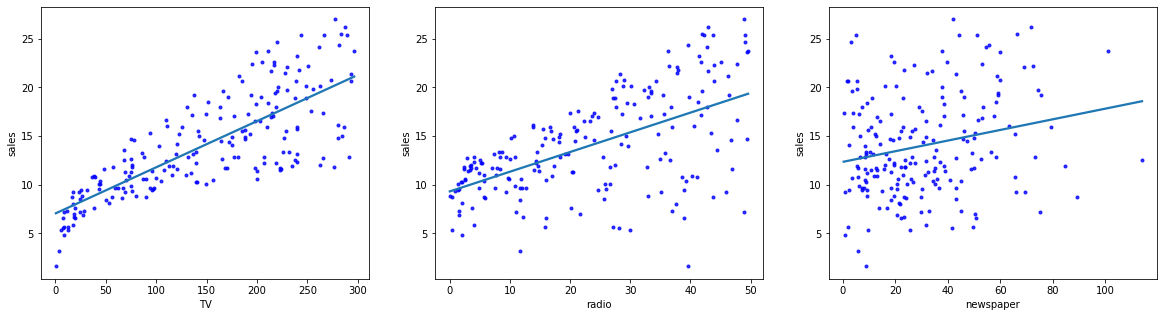

In [51]:
fig, axs = plt.subplots(1,3)
sns.regplot(advertising.iloc[:,[0]], advertising.iloc[:,[3]], data=advertising, ci=None, order=1, scatter_kws={'color':'b','s':9}, ax=axs[0])
sns.regplot(advertising.iloc[:,[1]], advertising.iloc[:,[3]], data=advertising, ci=None, order=1, scatter_kws={'color':'b','s':9}, ax=axs[1])
sns.regplot(advertising.iloc[:,[2]], advertising.iloc[:,[3]], data=advertising, ci=None, order=1, scatter_kws={'color':'b','s':9}, ax=axs[2])
plt.show()

- Regression plots above show a clear indication that sales are related to all media with a positive slope coefficient
- The relationship is a weaker for newspaper when compared with TV and Radio

In [60]:
ad_corr = advertising[['TV', 'radio', 'newspaper']].corr(method='pearson')

- The heatmap for the correlation between all media is shown below:  
It is important to analyze the correlation plot to identify variables which are collinear. Collinear variables cause redundancy in the model as their
inclusion has no material effect on the response/dependent variable being estimated. It could be the case where the region with higher sales could just happen to be
a region where there is more spending on newspaper media, but the increase in sales is a result of spending on radio. This would not be found by conducting a simple linear resgression
with newspaper only. Once a multiple regression model is built using all media we will be able to identify this using the t-statistic and p-values of the coeffecients of the 
regression model.

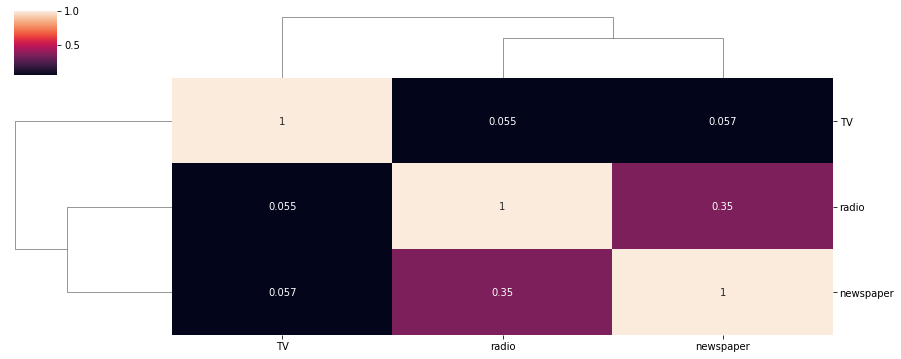

In [61]:
fig = sns.clustermap(ad_corr,
              annot=True,
              row_cluster=True,
              col_cluster=True,
              figsize=(12,5))
plt.setp(fig.ax_heatmap.xaxis.get_majorticklabels(), rotation=0)
plt.setp(fig.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [69]:
mod = sm.OLS(y, x)
reg = mod.fit()
print(reg.summary().tables[0])

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 20 Dec 2020   Prob (F-statistic):           1.58e-96
Time:                        19:33:01   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         


- The table above shows a significant p-value for the f-statistic showing that the model coeffecients are different from 0

In [70]:
print(reg.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
const          2.9389      0.312      9.422      0.000       2.324       3.554


- The p-values for all coeffecient are significant except for newspaper. This confirms that newspaper adds little to no values in predicting sales.

- Fit without newspaper

In [79]:
x = sm.add_constant(advertising[['TV', 'radio']], prepend=False)
y = advertising['sales']

mod2 = sm.OLS(y, x)
reg2 = mod2.fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 20 Dec 2020   Prob (F-statistic):           4.83e-98
Time:                        19:39:14   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0458      0.001     32.909      0.0

- Contour plot for RSS based on TV and Model Intercept

After fitting the model without newspaper the f-statistics improves significantly, and R-squared values remains unchanged. This shows that exclusion of newspaper from the overall model has no impact on modeling sales.

The code below illustrates how linear regression uses RSS(Root Squared Error) as the objective function to find the least squares line. For illustration purposes a new linear model is built by regressing sales on the variable TV.  
The code is inspired by:  
https://nbviewer.jupyter.org/github/JWarmenhoven/ISL-python/blob/master/Notebooks/Chapter%203.ipynb

In [133]:
X = scale(advertising['TV'], with_mean=True, with_std=False).reshape(-1,1)
Y = advertising['sales']
reg3 = LinearRegression()
reg3.fit(X, Y)
print(reg3.intercept_)
print(reg3.coef_)

14.0225
[0.04753664]


In [138]:
B0 = np.linspace(reg3.intercept_-2, reg3.intercept_+2, 50)
B1 = np.linspace(reg3.coef_-0.02, reg3.coef_+0.02, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size, B1.size))

#calculate the z-axis for RSS
for (i, j), v in np.ndenumerate(Z):
    Z[i, j] = ((y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()/1000
    
#minimize RSS
min_rss = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((reg3.intercept_+reg3.coef_*X - Y.values.reshape(-1,1))**2)/1000
min_rss

2.1025305831313514

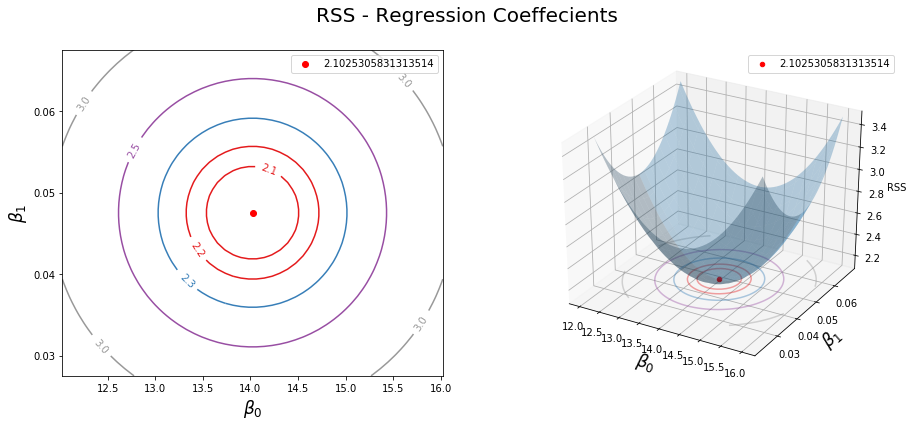

In [139]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - Regression Coeffecients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

#left plot
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(reg3.intercept_, reg3.coef_[0], c='r', label=min_rss)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

#right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
           alpha=0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(reg3.intercept_, reg3.coef_, min_rss, c='r', label=min_rss)
ax2.set_zlabel('RSS')
ax2.set_zlim(Z.min(), Z.max())
ax2.set_ylim(0.02, 0.07)

#titles common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.set_yticks([0.03, 0.04, 0.05, 0.06])
    ax.legend()